In [3]:
import pandas as pd
csv_file = pd.read_csv('final-result.csv', index_col=False)
featurues = ['accessed_file','recvsaction_android.intent.action.UMS_DISCONNECTED','recvsaction_android.intent.action.ACTION_POWER_CONNECTED',
             'recvsaction_android.intent.action.ACTION_SHUTDOWN','recvsaction_android.provider.Telephony.SMS_RECEIVED',
             'recvsaction_android.intent.action.SIG_STR','recvsaction_com.android.vending.INSTALL_REFERRER',
             'recvsaction_android.intent.action.NEW_OUTGOING_CALL','recvsaction_android.provider.Telephony.WAP_PUSH_RECEIVED',
             'recvsaction_android.intent.action.BOOT_COMPLETED','recvsaction_android.intent.action.PHONE_STATE',
             'recvsaction_android.intent.action.PACKAGE_REMOVED','recvsaction_android.intent.action.USER_PRESENT',
             'data_leaks_count','tag_count','servicestart_found_com.android.mms.transaction.SmsReceiverService',
             'servicestart_found_com.android.contacts.ViewNotificationService','servicestart_found_com.android.battery.BridgeProvider',
             'servicestart_found_com.safetest.tractor.UpdateService','servicestart_found_com.android.providers.downloads.DownloadService',
             'servicestart_found_com.android.contacts.calllog.CallLogNotificationsService','servicestart_found_com.safetest.five.SoundService',
             'servicestart_found_com.geinimi.custom.GoogleKeyboard','tag_name_TAINT_LOCATION','tag_name_TAINT_CONTACTS','tag_name_TAINT_MIC',
             'tag_name_TAINT_PHONE_NUMBER','tag_name_TAINT_LOCATION_GPS','tag_name_TAINT_LOCATION_NET','tag_name_TAINT_LOCATION_LAST',
             'tag_name_TAINT_CAMERA','tag_name_TAINT_ACCELEROMETER','tag_name_TAINT_SMS','tag_name_TAINT_IMEI','tag_name_TAINT_IMSI',
             'tag_name_TAINT_ICCID','tag_name_TAINT_DEVICE_SN','tag_name_TAINT_ACCOUNT','tag_name_TAINT_BROWSER','tag_name_TAINT_OTHERDB',
             'tag_name_TAINT_FILECONTENT','tag_name_TAINT_PACKAGE','tag_name_TAINT_CALL_LOG','tag_name_TAINT_EMAIL','tag_name_TAINT_CALENDAR',
             'tag_name_TAINT_SETTINGS','fdaccess_pipe','fdaccess_cmdline','fdaccess_shared_prefs','fdaccess_dat','fdaccess_sdcard','fdaccess_info',
             'fdaccess_jar','fdaccess_db','fdaccess_txt','fdaccess_urandom','fdaccess_if_inet6','phonecalls','sendsms']
X = csv_file[featurues]
Y = csv_file.label

In [4]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

C:\Users\Waqar\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<h3>Classification Accuracy: Percentage of correct prediction</h3>

In [5]:
from sklearn.svm import SVC

C = 1.0  # SVM regularization parameter
svc = SVC(C=C, kernel='rbf', probability=True).fit(x_train,y_train)
y_predict = svc.predict(x_test)

In [6]:
from sklearn import metrics
print metrics.accuracy_score(y_predict, y_test)

0.884498480243


### Null Accuracy: accuracy that could be achieved by always predicting the most frequent class

In [7]:
# calculate percentage of 1
y_test.mean()

0.4726443768996961

In [8]:
#calculate percentage of 0
print 1-y_test.mean()

0.5273556231


In [9]:
# Null Accuracy
max(y_test.mean(),1-y_test.mean())

0.5273556231003039

### compare <strong>true</strong> and <strong>predict</strong> response values

In [10]:
print 'True : ', y_test[0:29]
print 'Pred : ', y_predict[0:29]

True :  92      1
1655    0
1376    0
1936    0
2221    0
2311    0
2094    0
2576    0
2595    0
2398    0
224     1
1211    1
2460    0
53      1
746     1
276     1
1012    1
2255    0
878     1
2577    0
1385    0
2532    0
2434    0
306     1
2420    0
634     1
2145    0
192     1
2194    0
Name: label, dtype: int64
Pred :  [1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0]


### Confusion Matrix

In [11]:
confusion_matrics = metrics.confusion_matrix(y_test, y_predict)
print confusion_matrics
TP = confusion_matrics[1,1]
TN = confusion_matrics[1,0]
FP = confusion_matrics[0,1]
FN = confusion_matrics[1,0]

[[321  26]
 [ 50 261]]


## Metrics computed from computed matrix <h4>Classification Accuracy: Overall, how often is classifier correct</h4>

In [12]:
print (TP+TN)/float(TP+TN+FP+FN)
print metrics.accuracy_score(y_test, y_predict)

0.803617571059
0.884498480243


<h4>Classification Error: Overall, how often is classifier incorrect?</h4>

In [13]:
print (FP+FN)/float(TP+TN+FP+FN)
print 1- metrics.accuracy_score(y_test, y_predict)

0.196382428941
0.115501519757


<h4>False Positive Rate</h4>

In [14]:
print FP/float(TN +FP)

0.342105263158


<h4>True Positive Rate</h4>

In [15]:
print TP/float(TN +FP)

3.43421052632


<h4>Precision Score</h4>

In [16]:
print TP/float(TP +FP)
print metrics.precision_score(y_test, y_predict)

0.909407665505
0.909407665505


# Adjusting the Classification Threshold

In [17]:
print svc.predict(x_test)[0:20]

[1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0]


In [18]:
# print the first 10 predicated probabilities
svc.predict_proba(x_test)[0:20,1]

array([ 0.98639195,  0.17749704,  0.00374828,  0.17749704,  0.0083546 ,
        0.75501779,  0.17749704,  0.17749704,  0.0083546 ,  0.17749704,
        0.61588115,  0.98348096,  0.0083546 ,  0.83159621,  0.96642471,
        0.9999953 ,  0.99079912,  0.0083546 ,  0.99694185,  0.0083546 ])

In [19]:
y_pred_proba = svc.predict_proba(x_test)[:, 1]

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size']=12

In [36]:
plt.hist(y_pred_proba, bins=8,normed=1, color=cs, alpha=0.75, linewidth=0.01)
plt.xlim(0,1)
plt.title('Malware Prediction Probability')
plt.xlabel('Predicted Probability of Label Result')
plt.ylabel('Frequency')

NameError: name 'cs' is not defined

## Decrease the threshold value to increase sensitivity of the classifier

In [22]:
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_proba, 0.4)
# Set the threshold value to 0.4

C:\Users\Waqar\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [23]:
y_pred_proba[0:30]

array([ 0.98639195,  0.17749704,  0.00374828,  0.17749704,  0.0083546 ,
        0.75501779,  0.17749704,  0.17749704,  0.0083546 ,  0.17749704,
        0.61588115,  0.98348096,  0.0083546 ,  0.83159621,  0.96642471,
        0.9999953 ,  0.99079912,  0.0083546 ,  0.99694185,  0.0083546 ,
        0.00374828,  0.0083546 ,  0.00794241,  0.94231565,  0.01769389,
        0.96821702,  0.00794241,  0.78483959,  0.00794241,  0.18104117])

In [24]:
y_pred_class
print confusion_matrics

[[321  26]
 [ 50 261]]


In [25]:
#print metrics.confusion_matrix(y_test, y_pred_class)

# ROC Curve and AUC Curve

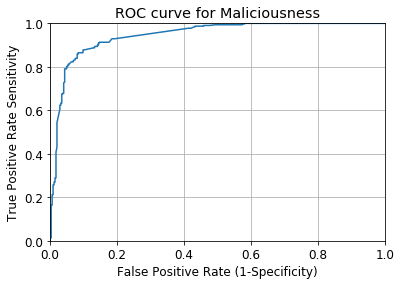

In [26]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr,tpr)
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.title('ROC curve for Maliciousness')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate Sensitivity')
plt.grid(True)

# AUC

In [27]:
print metrics.roc_auc_score(y_test,y_pred_proba)

0.945740708137


In [28]:
test_case = [1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0]
svc.predict(test_case)

C:\Users\Waqar\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1], dtype=int64)

# F1 Score

In [29]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict, average=None)

array([ 0.89415042,  0.8729097 ])